[ 56.    -12.     -0.375]
[ -9.       -22.5        1.015625]
[0.9073469345448947, -1.4186784686260174]


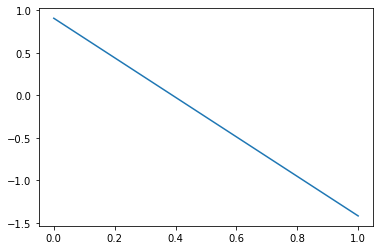

In [213]:
import numpy as np
import DIC.DIC as DIC
import matplotlib.pyplot as plt

class G():
    def __init__(self, K1, K2, F_STRESS, r, theta):
        K1 = K1
        K2 = K2
        F_STRESS = F_STRESS
        r = r
        theta = np.deg2rad(theta)

    def g(self, effective_strain):
        result = 1/(2*pi*r) * ((K1*sin(theta)+ 2*K2*cos(theta))**2 +(K2*sin(theta)**2)) \
                 + 2 * F_STRESS / (sqrt(2*pi*r))*(K1*sin(1+2*cos(theta)) + K2*(1+2*cos(theta)**2+cos(theta))) \
                 + F_STRESS**2 - effective_strain
        return result

    def delta_k1(self):
        result = (K1*sin(theta)+2*K2*cos(theta)) / (pi * r) \
                 + (sqrt(2)*F_STRESS*(2*cos(theta)+1)*sin(theta/2)*sin(theta))/sqrt(pi*r)
        return result

    def delta_k2(self):
        result = (2*K2*sin(theta)**2 + 4*(K1*sin(theta)+ 2*K2*cos(theta))*cos(theta))/(2*pi*r) \
                 + (sqrt(2)*F_STRESS*(2*cos(theta)**2 + cos(theta)+1)*sin(theta/2))/sqrt(pi*r)
        return result

    def delta_stress(self):
        result = 2*F_STRESS + ( sqrt(2)* sin(theta/2)* (K1 * (2*cos(theta)+1)*sin(theta) + K2*(2*cos(theta)**2 +cos(theta) +1)))/sqrt(pi*r)
        return result

In [ ]:
iteration = 10
youngs_modulus = 71700
poisson_ratio = 0.33

K1, K2, F_STRESS= 100,100,100
gk_list=[]

for i in range(iteration):
    A_matrix = [[0,0,0]]
    G_matrix = [[0]]
    for x, y, degree, rho in location:


        gk = G(K1,K2,F_STRESS,rho, degree)
        A_matrix = vstack((A_matrix,[gk.delta_k1(), gk.delta_k2(), gk.delta_stress()]))
        G_matrix = vstack((G_matrix,[gk.g(sigma_effective)]))
    A_matrix = -A_matrix[1:,]
    G_matrix = G_matrix[1:,]
    delta_matrix = dot(linalg.inv(dot(A_matrix.transpose(), A_matrix)),dot(A_matrix.transpose(),G_matrix)).flatten()
    gk_list.append(average(G_matrix))
    K1 = K1+delta_matrix[0]
    K2 = K2+delta_matrix[1]
    F_STRESS = F_STRESS + delta_matrix[2]

print(K1,K2, F_STRESS)
plt.plot(arange(iteration),gk_list)
print(gk_list)
